In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import Convolution, MaxPooling, ReLU, Affine, SoftmaxWithLoss, SimpleConvNet
from common.optimizer import RMSProp, Adam
from sklearn.model_selection import train_test_split

In [3]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print(train_data.shape)
print(train_label.shape)

(3000, 1, 28, 28)
(3000, 15)


In [4]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')

In [5]:
# 配列形式変更
#train_data = train_data.reshape(-1, 28*28)
#print("train_data.shape=", train_data.shape)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state=1234,
shuffle=True)
print(X_train.shape, X_test.shape)

(2100, 1, 28, 28) (900, 1, 28, 28)


In [23]:
x = train_data
t = train_label

x = x.reshape(-1,1,28,28) # 配列形式の変形

epochs = 64
batch_size = 128

optimizer = Adam(lr=0.001, rho1=0.9, rho2=0.999)

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(int)


# CNNのオブジェクト生成
snet = SimpleConvNet(input_dim=(1, 28, 28), 
                     conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                     pool_param={'pool_size':2, 'pad':0, 'stride':2},
                     hidden_size=100, output_size=15, weight_init_std=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):
    print("epoch=%s"%epoch)

    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        #print("it=", it)
        mask = idx[batch_size*it : batch_size*(it+1)]

        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]

        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = snet.gradient(x_train, t_train)

        # 更新
        optimizer.update(snet.params, grads)

    ## 学習経過の記録

    # 訓練データにおけるloss
#     print("calculating train_loss")    
    train_loss.append(snet.loss(x,  t))

#     print("calculating test_loss")
    # テストデータにおけるloss
    test_loss.append(snet.loss(X_test, y_test))

#     print("calculating train_accuracy")
    # 訓練データにて精度を確認
    train_accuracy.append(snet.accuracy(x, t))
    
#     print("calculating test_accuracy")
    # テストデータにて精度を算出
    test_accuracy.append(snet.accuracy(X_test, y_test))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29
epoch=30
epoch=31
epoch=32
epoch=33
epoch=34
epoch=35
epoch=36
epoch=37
epoch=38
epoch=39
epoch=40
epoch=41
epoch=42
epoch=43
epoch=44
epoch=45
epoch=46
epoch=47
epoch=48
epoch=49
epoch=50
epoch=51
epoch=52
epoch=53
epoch=54
epoch=55
epoch=56
epoch=57
epoch=58
epoch=59
epoch=60
epoch=61
epoch=62
epoch=63


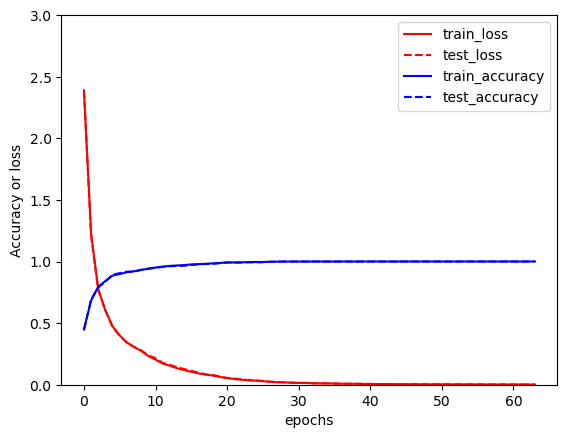

In [24]:
# lossとaccuracyのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})

df_log.plot(style=['r-', 'r--', 'b-', 'b--'])
plt.ylim([0,3])
plt.ylabel("Accuracy or loss")
plt.xlabel("epochs")
plt.show()

In [25]:
with open("katakana_model.pickle", "wb") as f:
    pickle.dump(snet, f)